📈 Example of Team Journeys:


season,21-22,22-23,23-24,24-25
team_name,,,,
Arsenal,Balanced / mid-control,Dominant control + high press,Dominant control + high press,Dominant control + high press
Aston Villa,Balanced / mid-control,Low control + low threat,Balanced / mid-control,Balanced / mid-control
Brentford,Set-piece & throw-in focused,Set-piece & throw-in focused,Set-piece & throw-in focused,Set-piece & throw-in focused
Brighton & Hove Albion,Balanced / mid-control,Dominant control + high press,Balanced / mid-control,Balanced / mid-control
Chelsea,Dominant control + high press,Balanced / mid-control,Balanced / mid-control,Balanced / mid-control
Crystal Palace,Balanced / mid-control,Low control + low threat,Low control + low threat,Reactive / defensive + wide-direct
Everton,Reactive / defensive + wide-direct,Reactive / defensive + wide-direct,Reactive / defensive + wide-direct,Reactive / defensive + wide-direct
Liverpool,Dominant control + high press,Dominant control + high press,Dominant control + high press,Dominant control + high press
Manchester City,Dominant control + high press,Dominant control + high press,Dominant control + high press,Dominant control + high press


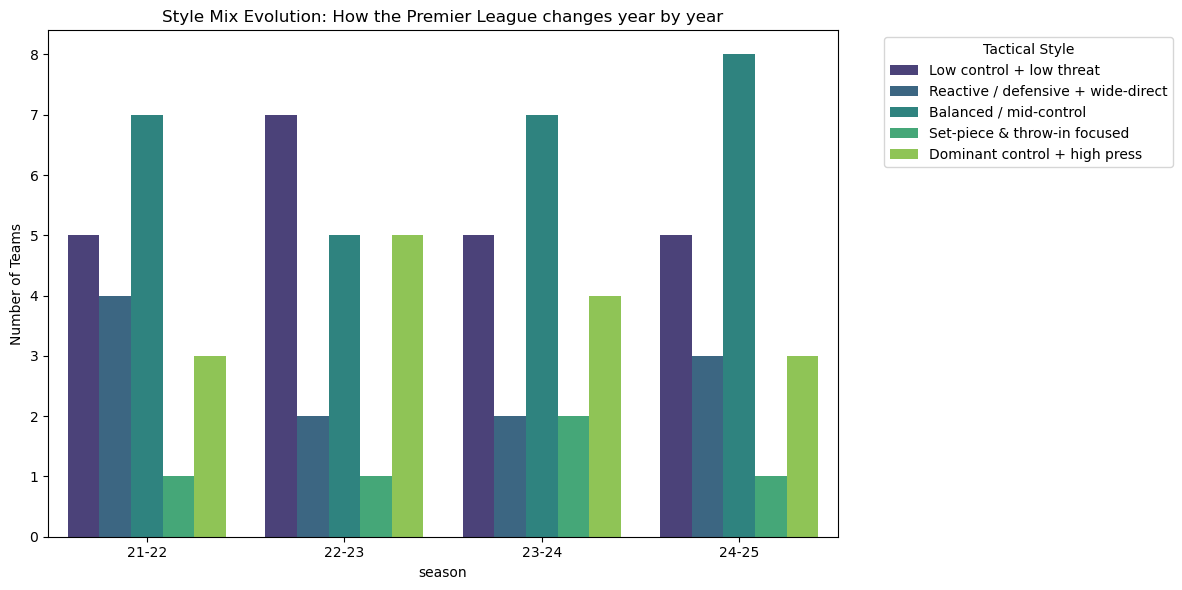

In [12]:
# ============================================================
# TEAM JOURNEYS & STYLE EVOLUTION 1
# ============================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

#1. Load the labeled dataset
PROJECT_ROOT = Path.cwd().parents[1]
labeled_path = (
    PROJECT_ROOT
    / "pl_21-25_analysis"
    / "data_processed"
    / "final"
    / "team_season_clusters_k5_labeled.csv"
)
df_evolution = pd.read_csv(labeled_path)

# 2. Pivot Table to view progress (Team Journey)
journey_pivot = df_evolution.pivot(index='team_name', columns='season', values='cluster_label')

print("📈 Example of Team Journeys:")
display(journey_pivot.dropna().head(10)) # Teams that have been in every season

# 3. Visualization: Style Distribution by Era (Style Mix)
plt.figure(figsize=(12, 6))
sns.countplot(data=df_evolution, x='season', hue='cluster_label', palette='viridis')
plt.title('Style Mix Evolution: How the Premier League changes year by year')
plt.legend(title='Tactical Style', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Number of Teams')
plt.tight_layout()
plt.show()

📈 Team Style Journeys (Sample):


season,21-22,22-23,23-24,24-25
team_name,,,,
Arsenal,Balanced / mid-control,Dominant control + high press,Dominant control + high press,Dominant control + high press
Aston Villa,Balanced / mid-control,Low control + low threat,Balanced / mid-control,Balanced / mid-control
Brentford,Set-piece & throw-in focused,Set-piece & throw-in focused,Set-piece & throw-in focused,Set-piece & throw-in focused
Brighton & Hove Albion,Balanced / mid-control,Dominant control + high press,Balanced / mid-control,Balanced / mid-control
Chelsea,Dominant control + high press,Balanced / mid-control,Balanced / mid-control,Balanced / mid-control
Crystal Palace,Balanced / mid-control,Low control + low threat,Low control + low threat,Reactive / defensive + wide-direct
Everton,Reactive / defensive + wide-direct,Reactive / defensive + wide-direct,Reactive / defensive + wide-direct,Reactive / defensive + wide-direct
Liverpool,Dominant control + high press,Dominant control + high press,Dominant control + high press,Dominant control + high press
Manchester City,Dominant control + high press,Dominant control + high press,Dominant control + high press,Dominant control + high press



🔥 Most Volatile Teams (Frequent style changes):
team_name
West Ham United           3
Crystal Palace            3
Newcastle United          3
AFC Bournemouth           2
Aston Villa               2
Brighton & Hove Albion    2
Burnley                   2
Chelsea                   2
Tottenham Hotspur         2
Southampton               2
Name: cluster_label, dtype: int64

🛡️ Most Stable Teams (Consistent DNA):
team_name
Manchester United    1
Watford              1
Sheffield United     1
Norwich City         1
Liverpool            1
Manchester City      1
Luton Town           1
Leicester City       1
Leeds United         1
Ipswich Town         1
Name: cluster_label, dtype: int64

✅ Journey matrix saved for Tableau: C:\Users\tozes\Documents\IronHack\pl_21-25_analysis\data_processed\team_journey_matrix.csv


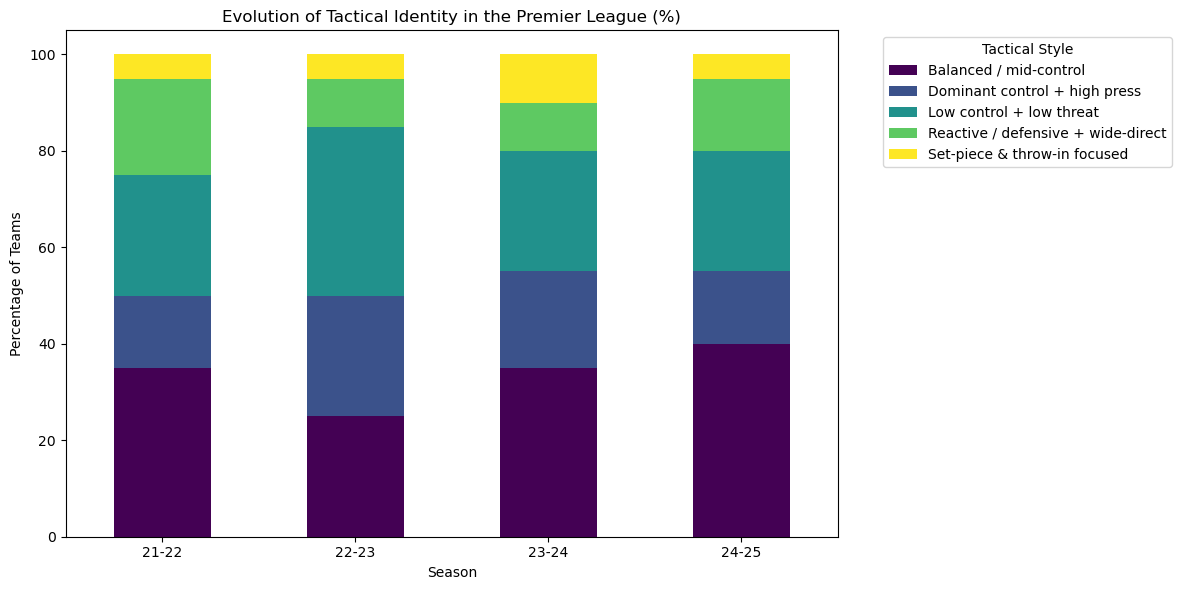

In [17]:
# ============================================================
# TEAM JOURNEYS & STYLE EVOLUTION 2
# ============================================================

# 2. Create the Team Journey Matrix (Pivot Table)
# This shows the tactical label for each team across all seasons
journey_matrix = df_evolution.pivot(index='team_name', columns='season', values='cluster_label')

print("📈 Team Style Journeys (Sample):")
display(journey_matrix.dropna().head(10)) 

# 3. Calculate Style Volatility
# Measures how many different clusters a team has belonged to over the 4 years
volatility = df_evolution.groupby('team_name')['cluster_label'].nunique().sort_values(ascending=False)

print("\n🔥 Most Volatile Teams (Frequent style changes):")
print(volatility.head(10))

print("\n🛡️ Most Stable Teams (Consistent DNA):")
print(volatility[volatility == 1].head(10))

# 4. Save results for Tableau visualization
out_journey = PROJECT_ROOT / "pl_21-25_analysis" / "data_processed" / "tableau" / "team_journey_matrix.csv"
journey_matrix.to_csv(out_journey)
print(f"\n✅ Journey matrix saved for Tableau: {out_journey}")

# 5. Visual: Style Mix Evolution (Stacked Bar Chart)
# Shows the distribution of tactical identities in the league per season
style_counts = df_evolution.groupby(['season', 'cluster_label']).size().unstack().fillna(0)
style_share_pct = style_counts.div(style_counts.sum(axis=1), axis=0) * 100

style_share_pct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Evolution of Tactical Identity in the Premier League (%)')
plt.ylabel('Percentage of Teams')
plt.xlabel('Season')
plt.legend(title='Tactical Style', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

🏆 Style Success Ranking (Average Season Points):


,points
cluster_label,
Dominant control + high press,79.266667
Balanced / mid-control,55.111111
Set-piece & throw-in focused,50.400000
Reactive / defensive + wide-direct,44.181818
Low control + low threat,36.136364


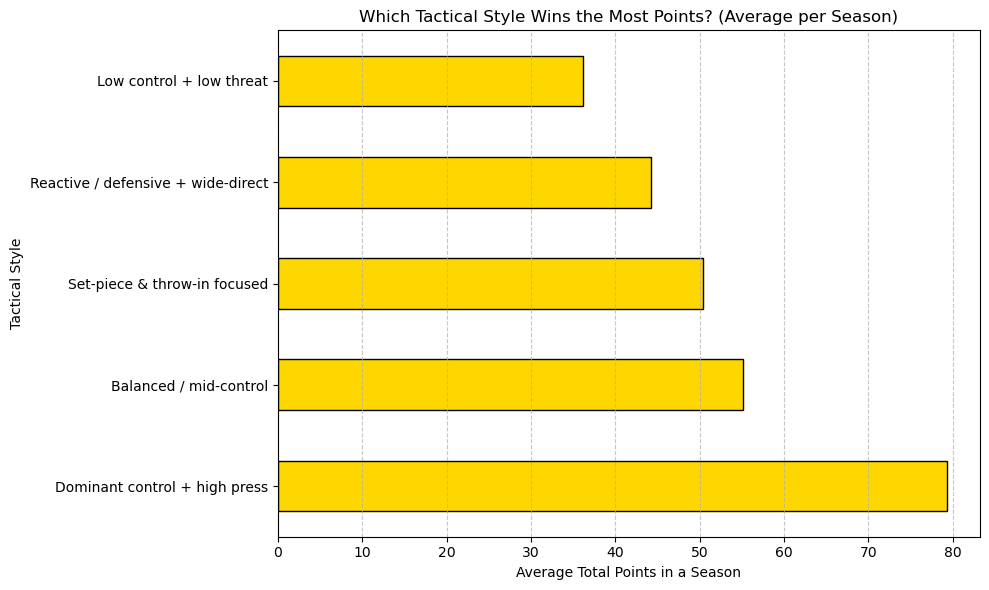


💡 CONCLUSÃO: O estilo 'Dominant control + high press' é o mais eficaz,
conquistando em média 79.3 pontos por época.


In [28]:
# ============================================================
# FINAL SUCCESS RANKING (USING POINTS)
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt

#1. Load the enriched dataset
PROJECT_ROOT = Path.cwd().parents[1]
enriched_path = (
    PROJECT_ROOT
    / "pl_21-25_analysis"
    / "data_processed"
    / "tableau"
    / "v_team_match_enriched.csv"
)
df_matches = pd.read_csv(enriched_path)

# 2. Calcular o total de pontos por equipa e por época
season_points = df_matches.groupby(['team_name', 'season'])['points'].sum().reset_index()

# 4. Cruzar os dados (Merge) para trazer os pontos para o dataset de clusters
df_final_success = df_evolution.merge(season_points, on=['team_name', 'season'], how='left')

# 5. Calcular a média de pontos por estilo (Cluster)
style_ranking_pts = df_final_success.groupby('cluster_label')['points'].mean().sort_values(ascending=False)

# 6. Visualização
print("🏆 Style Success Ranking (Average Season Points):")
display(style_ranking_pts.to_frame())

plt.figure(figsize=(10, 6))
style_ranking_pts.plot(kind='barh', color='gold', edgecolor='black')
plt.title('Which Tactical Style Wins the Most Points? (Average per Season)')
plt.xlabel('Average Total Points in a Season')
plt.ylabel('Tactical Style')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- INSIGHT FINAL ---
best_style = style_ranking_pts.index[0]
print(f"\n💡 CONCLUSÃO: O estilo '{best_style}' é o mais eficaz,")
print(f"conquistando em média {style_ranking_pts.iloc[0]:.1f} pontos por época.")

In [31]:
# ============================================================
# PREPARING THE MASTER TABLEAU FILE
# ============================================================

# 1. Usar o df_final_success que já tem os pontos e os clusters
tableau_df = df_final_success.copy()

# 2. Selecionar e ordenar as colunas para facilitar a vida no Tableau
# Incluímos as métricas originais para poderes criar tooltips detalhados
columns_for_tableau = [
    'season', 'team_name', 'cluster_label', 'points', 'xgd',
    'possession', 'field_tilt', 'ppda', 'xt', 'passes_into_box', 
    'avg_pass_height', 'set_piece_xg'
]

# Garantir que apenas colunas existentes são selecionadas
final_cols = [c for c in columns_for_tableau if c in tableau_df.columns]
tableau_master = tableau_df[final_cols]

# 3. Exportar para a pasta de dados processados
tableau_out_path = PROJECT_ROOT / "pl_21-25_analysis" / "data_processed" / "tableau" / "v_tableau_final_analysis.csv"
tableau_master.to_csv(tableau_out_path, index=False)

print(f"✅ Tableau Master File ready!")
print(f"📍 Location: {tableau_out_path}")
print(f"📊 Rows: {tableau_master.shape[0]} | Columns: {tableau_master.shape[1]}")

display(tableau_master.head())

✅ Tableau Master File ready!
📍 Location: C:\Users\tozes\Documents\IronHack\pl_21-25_analysis\data_processed\tableau\v_tableau_final_analysis.csv
📊 Rows: 80 | Columns: 12


,season,team_name,cluster_label,points,xgd,possession,field_tilt,ppda,xt,passes_into_box,avg_pass_height,set_piece_xg
0,21-22,Norwich City,Low control + low threat,22,-1.349474,42.813158,37.698684,17.623421,0.467368,9.4737,43.436579,0.115526
1,21-22,Watford,Low control + low threat,23,-0.781053,40.665789,40.829737,17.702368,0.530263,8.8158,45.790263,0.145789
2,21-22,Wolverhampton Wanderers,Low control + low threat,51,-0.738421,49.531579,45.955263,17.023421,0.518947,9.0000,44.729737,0.142368
3,21-22,Burnley,Reactive / defensive + wide-direct,35,-0.660526,40.060526,43.565000,15.443684,0.585789,10.7105,49.378421,0.252368
4,21-22,Leicester City,Low control + low threat,52,-0.638421,51.997368,46.185000,14.942368,0.603158,10.7105,44.845263,0.160263
